# Architecture Choice

Comparing RNN, CNN, Linear, and BiGRU-CRF for ESM-1b and ESM-2, both continuous and binary

In [2]:
import pandas as pd
from ray.tune import ExperimentAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', style="darkgrid", font="serif", palette=None, font_scale=1.1)

In [3]:
df_arch_disprot_esm1 = ExperimentAnalysis("../data/results/architecture_choice/architecture_choice_disprot_esm1").results_df.dropna(subset=['loss'])
df_arch_disprot_esm2 = ExperimentAnalysis("../data/results/architecture_choice/architecture_choice_disprot_esm2").results_df.dropna(subset=['loss'])

df_arch_chezod_esm1 = ExperimentAnalysis("../data/results/architecture_choice/architecture_choice_chezod_esm1").results_df.dropna(subset=['loss'])
df_arch_chezod_esm2 = ExperimentAnalysis("../data/results/architecture_choice/architecture_choice_chezod_esm2").results_df.dropna(subset=['loss'])

In [4]:
df_arch_disprot_esm1['model_name'] = 'facebook/esm-1b'
df_arch_disprot_esm1['model_i'] = 1
df_arch_disprot_esm2['model_name'] = 'esm2_t33_650M_UR50D'
df_arch_disprot_esm2['model_i'] = 2

df_arch_chezod_esm1['model_name'] = 'facebook/esm-1b'
df_arch_chezod_esm1['model_i'] = 1
df_arch_chezod_esm2['model_name'] = 'esm2_t33_650M_UR50D'
df_arch_chezod_esm2['model_i'] = 2

df_arch_disprot = pd.concat([df_arch_disprot_esm1, df_arch_disprot_esm2])
df_arch_disprot['group_col'] = df_arch_disprot['model_name'].str.cat(df_arch_disprot['config/architecture'], sep='-')

df_arch_chezod = pd.concat([df_arch_chezod_esm1, df_arch_chezod_esm2])
df_arch_chezod['group_col'] = df_arch_chezod['model_name'].str.cat(df_arch_chezod['config/architecture'], sep='-')

In [209]:
df_arch_disprot.groupby(by='group_col').mean()

,loss,acc,bac,mcc,f1,time_this_iter_s,done,training_iteration,timestamp,time_total_s,pid,time_since_restore,timesteps_since_restore,iterations_since_restore,warmup_time,model_i
group_col,,,,,,,,,,,,,,,,
esm2_t33_650M_UR50D-cnn,0.402963,0.839662,0.629234,0.425972,0.490718,477.965698,1.0,10.333333,1.666470e+09,4957.430229,79872.666667,4957.430229,0.0,10.333333,0.005581,2.0
esm2_t33_650M_UR50D-linear,0.398665,0.842017,0.609744,0.411218,0.475141,474.745739,1.0,10.000000,1.666456e+09,4764.480323,88145.333333,4764.480323,0.0,10.000000,0.005134,2.0
esm2_t33_650M_UR50D-rnn,0.693146,0.808595,0.500000,0.000000,0.000000,537.605113,0.6,9.200000,1.666489e+09,4976.857617,117426.200000,4976.857617,0.0,9.200000,0.005463,2.0
esm2_t33_650M_UR50D-rnn_crf,83.022446,0.811351,0.658594,0.348852,0.452830,2592.092108,0.8,8.600000,1.666483e+09,22260.727191,57510.000000,22260.727191,0.0,8.600000,0.005463,2.0
facebook/esm-1b-cnn,0.422557,0.819990,0.625188,0.418491,0.510812,81.812981,1.0,8.333333,1.666454e+09,699.088320,92543.666667,699.088320,0.0,8.333333,0.006590,1.0
facebook/esm-1b-linear,0.417623,0.821464,0.653656,0.441763,0.546004,78.562551,1.0,8.500000,1.666442e+09,672.523538,98026.000000,672.523538,0.0,8.500000,0.005391,1.0
facebook/esm-1b-rnn,0.693146,0.779990,0.500000,0.000000,0.000000,128.519291,1.0,8.000000,1.666458e+09,1041.119487,64334.000000,1041.119487,0.0,8.000000,0.006713,1.0
facebook/esm-1b-rnn_crf,71.658699,0.778434,0.691981,0.378303,0.514240,750.689654,1.0,12.000000,1.666454e+09,9011.135109,109759.000000,9011.135109,0.0,12.000000,0.006402,1.0


In [36]:
arch_labels = {
    'linear': 'Linear',
    'cnn': 'CNN',
    'rnn': 'BiGRU',
    'rnn_crf': 'BiGRU-CRF'
}


def plot_metrics(ax, grouped_df, metric_col, metric_name, sort_metrics, min_c=0.7, max_c=1.03, invert_sort=False):
    width = 0.5
    items = grouped_df.sort_values(sort_metrics, ascending=[invert_sort, True])[metric_col]
    keys = items.keys()
    n = len(keys) / 2
    ls = []
    for i, k in enumerate(keys):
        arch_key = k.split('-')[-1]
        offset = width / 2 if i >= n else -width / 2
        l = ax.barh([i * width + offset], items[k], width, color='C{}'.format(int(n - 1 - i % n)),
                    label=arch_labels[arch_key])
        if i < n:
            ls.insert(0, l)

    ax.set_yticks([3, 0.5] if n == 4 else [2.25, 0.31],
                  labels=['ESM-2', 'ESM-1b'] if 'esm-1b' in keys[0] else ['ESM-1b', 'ESM-2'])
    ax.set_title(metric_name)
    ax.set_xlim([min(items.values) * min_c, max(items.values) * max_c])
    return ls

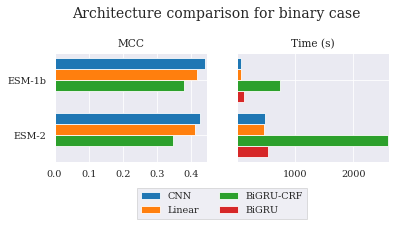

In [37]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

disprot_frozen_grouped = df_arch_disprot.groupby(by='group_col').mean()
sort_m = ['model_i', 'mcc']
ls = plot_metrics(ax1, disprot_frozen_grouped, 'mcc', 'MCC', sort_m, min_c=0.94, max_c=1.01)
plot_metrics(ax2, disprot_frozen_grouped, 'time_this_iter_s', 'Time (s)', sort_m, min_c=0.1, max_c=1.01)

ax1.legend(handles=ls, loc='upper center', bbox_to_anchor=(1.1, -0.2), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Architecture comparison for binary case', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-23_architecture_choice/bars_architecture_choice_disprot.png', bbox_inches='tight')
plt.show()

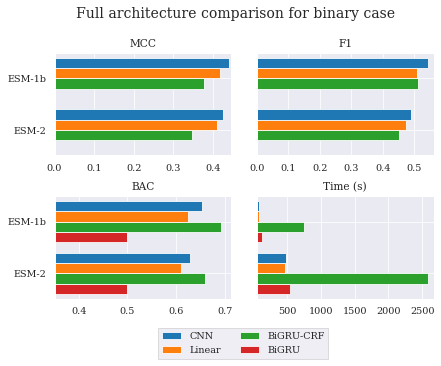

In [38]:
%matplotlib inline
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 4), sharey=True)
fig.tight_layout(h_pad=2)

disprot_frozen_grouped = df_arch_disprot.groupby(by='group_col').mean()
sort_m = ['model_i', 'mcc']
ls = plot_metrics(ax1, disprot_frozen_grouped, 'mcc', 'MCC', sort_m, min_c=0.94, max_c=1.01)
plot_metrics(ax2, disprot_frozen_grouped, 'f1', 'F1', sort_m)
plot_metrics(ax3, disprot_frozen_grouped, 'bac', 'BAC', sort_m)
plot_metrics(ax4, disprot_frozen_grouped, 'time_this_iter_s', 'Time (s)', sort_m)

ax1.legend(handles=ls, loc='upper center', bbox_to_anchor=(1.07, -1.64), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Full architecture comparison for binary case', fontsize=14, y=1.11)
fig.savefig('../figures/2022-10-23_architecture_choice/bars_architecture_choice_disprot_full.png', bbox_inches='tight')
plt.show()

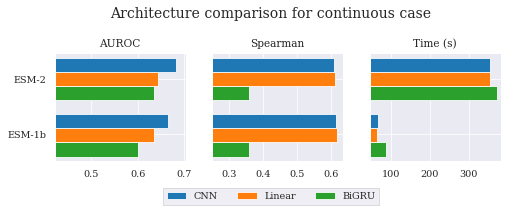

In [39]:
%matplotlib inline
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

chezod_frozen_grouped = df_arch_chezod.groupby(by='group_col').mean()
sort_m = ['model_i', 'auroc']
ls = plot_metrics(ax1, chezod_frozen_grouped, 'auroc', 'AUROC', sort_m, invert_sort=True)
plot_metrics(ax2, chezod_frozen_grouped, 'spearman', 'Spearman', sort_m, invert_sort=True)
plot_metrics(ax3, chezod_frozen_grouped, 'time_this_iter_s', 'Time (s)', sort_m, invert_sort=True)

ax1.legend(handles=ls, loc='upper center', bbox_to_anchor=(1.65, -0.2), fancybox=False, shadow=False, ncol=3)
fig.suptitle('Architecture comparison for continuous case', fontsize=14, y=1.2)
fig.savefig('../figures/2022-10-23_architecture_choice/bars_architecture_choice_chezod.png', bbox_inches='tight')
plt.show()